In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('powerplant.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

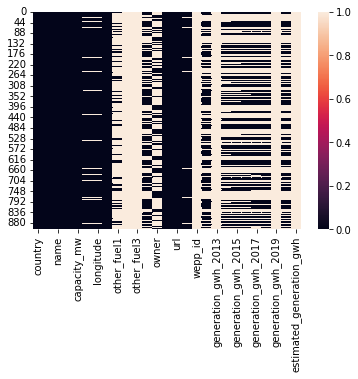

In [6]:
#Data visualization
#checking missing values
sns.heatmap(df.isnull())

Too many data is missing in the dataset

In [7]:
#dropping the following column as maximum of data is missing in it, irrelevant column wrt target variables and some of the column is empty

df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [8]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dtypes

name                       object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
source                     object
geolocation_source         object
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [10]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [11]:
#filling the missing values in dataset

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
df['other_fuel1']=imp.fit_transform(df['other_fuel1'].values.reshape(-1,1))
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['generation_data_source']=imp.fit_transform(df['generation_data_source'].values.reshape(-1,1))

imp=SimpleImputer(strategy='mean')
df['latitude']=imp.fit_transform(df['latitude'].values.reshape(-1,1))
df['longitude']=imp.fit_transform(df['longitude'].values.reshape(-1,1))
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))

In [12]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
source                      0
geolocation_source          0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source      0
dtype: int64

In [13]:
#Statisticial Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.464907,4.812291,68.6447,74.388900,76.979200,79.206100,95.408
commissioning_year,907.0,1997.091082,13.016360,1927.0000,1997.091082,1997.091082,2003.000000,2018.000
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0000,188.285252,737.205450,3282.861312,30015.000
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0000,177.874930,817.977250,3275.690475,35116.000
generation_gwh_2018,448.0,2600.804099,4314.880456,0.0000,193.378250,751.644375,3143.535900,35136.000


1. counts are not same for all the columns
2. mean is greater than 50% in all the columns
3. huge difference between max and 75% column
4. generation gwh 2013 and 2019 is empty

In [14]:
#Exploring target data variable
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

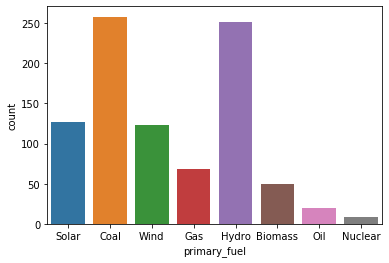

In [15]:
#checking income column value
sns.countplot(x='primary_fuel', data=df);
df.primary_fuel.value_counts()

coal and hydro is maximum

In [16]:
#Exploring target data variable
df.capacity_mw.unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

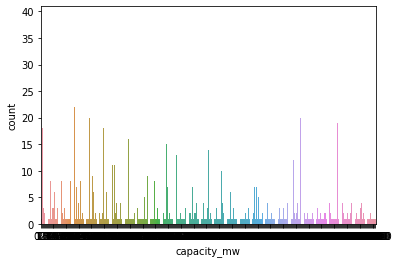

In [17]:
#checking income column value
sns.countplot(x='capacity_mw', data=df);

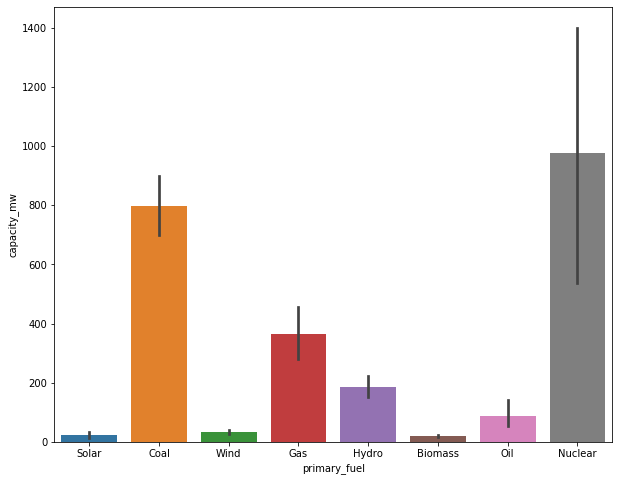

In [18]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

nuclear has the highest average capacity_mw

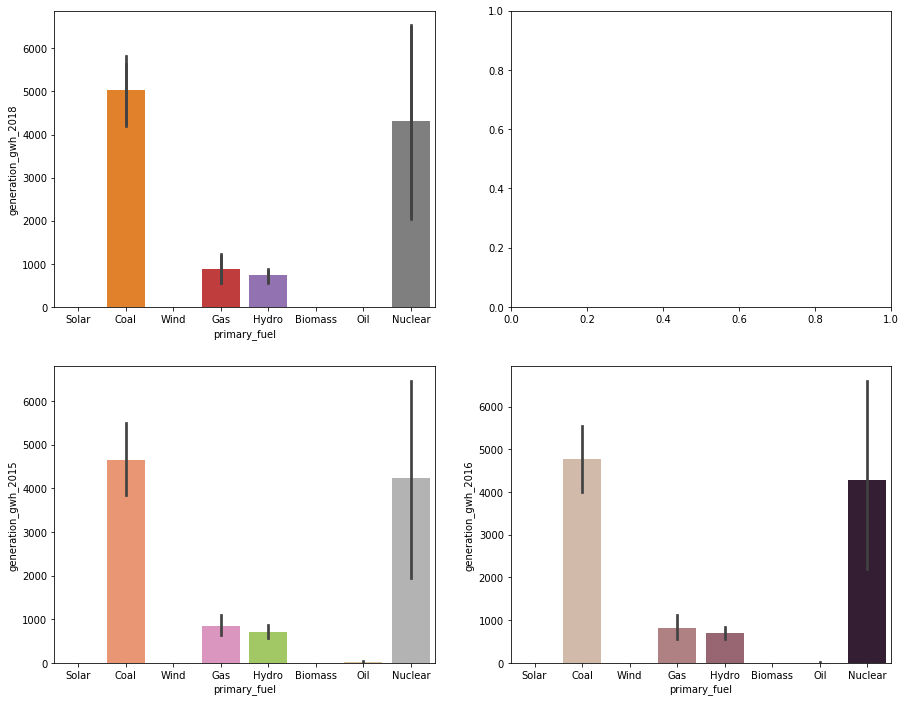

In [19]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")

# Checking generation growth in 2017
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[0,0],data=df)

# Checking generation growth in 2018
sns.barplot(x='primary_fuel',y='generation_gwh_2018',ax=axes[0,0],data=df)
plt.show()


nuclear is highest in all the years

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014B7C248>,
      dtype=object)

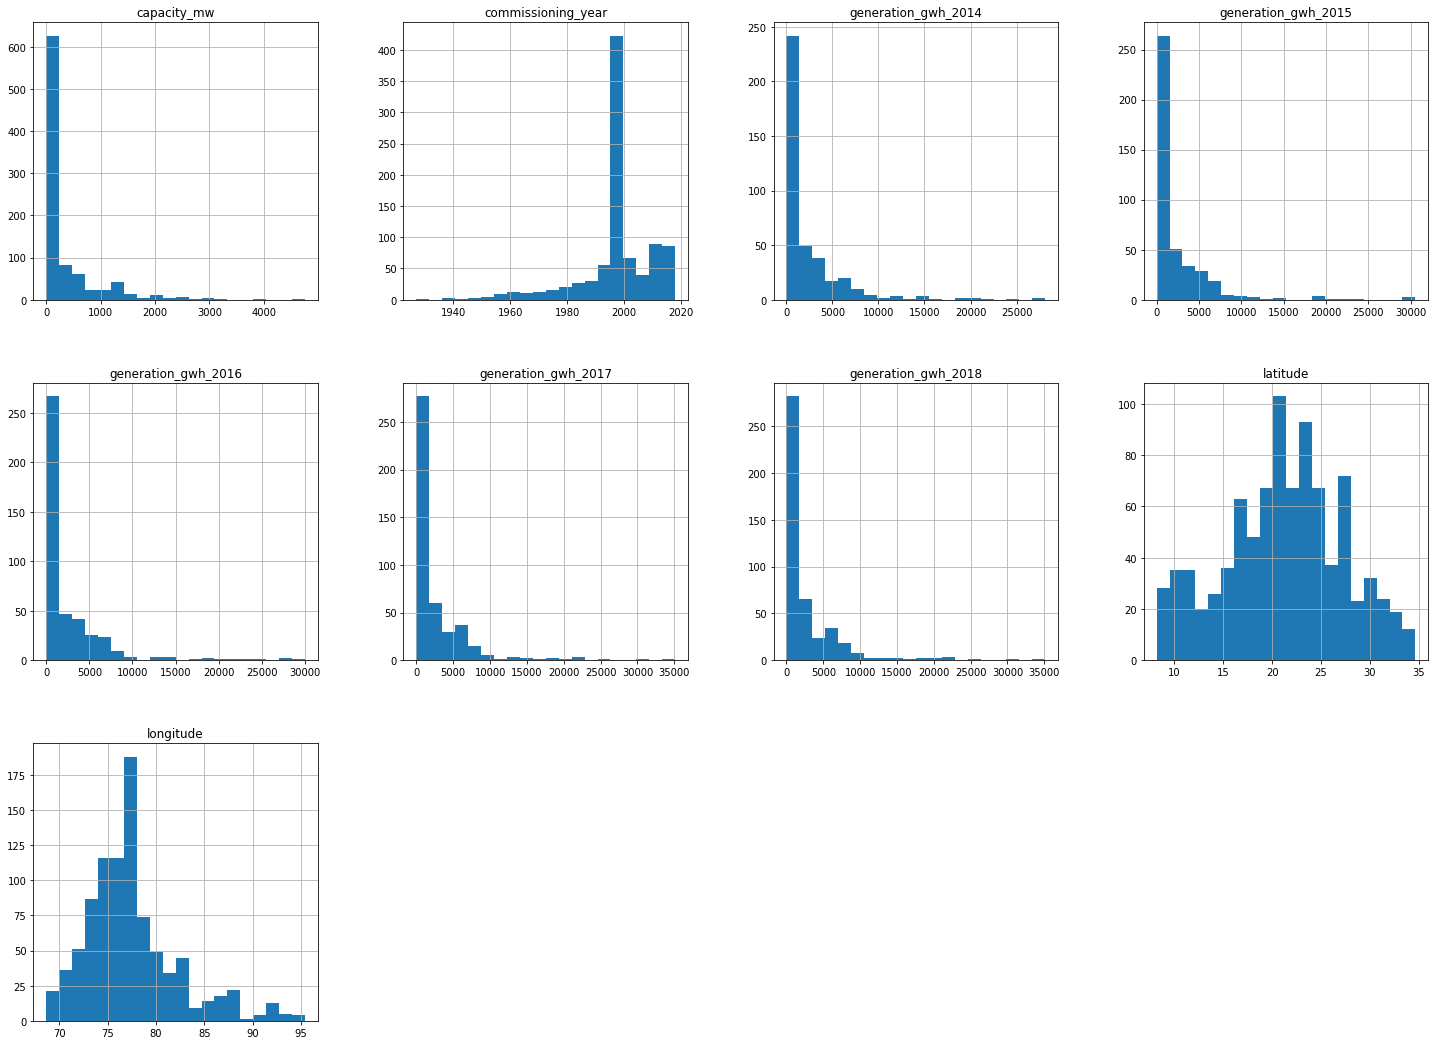

In [20]:
df.hist(figsize=(25,25), layout=(4,4), bins=20)

Data is not normally distributed

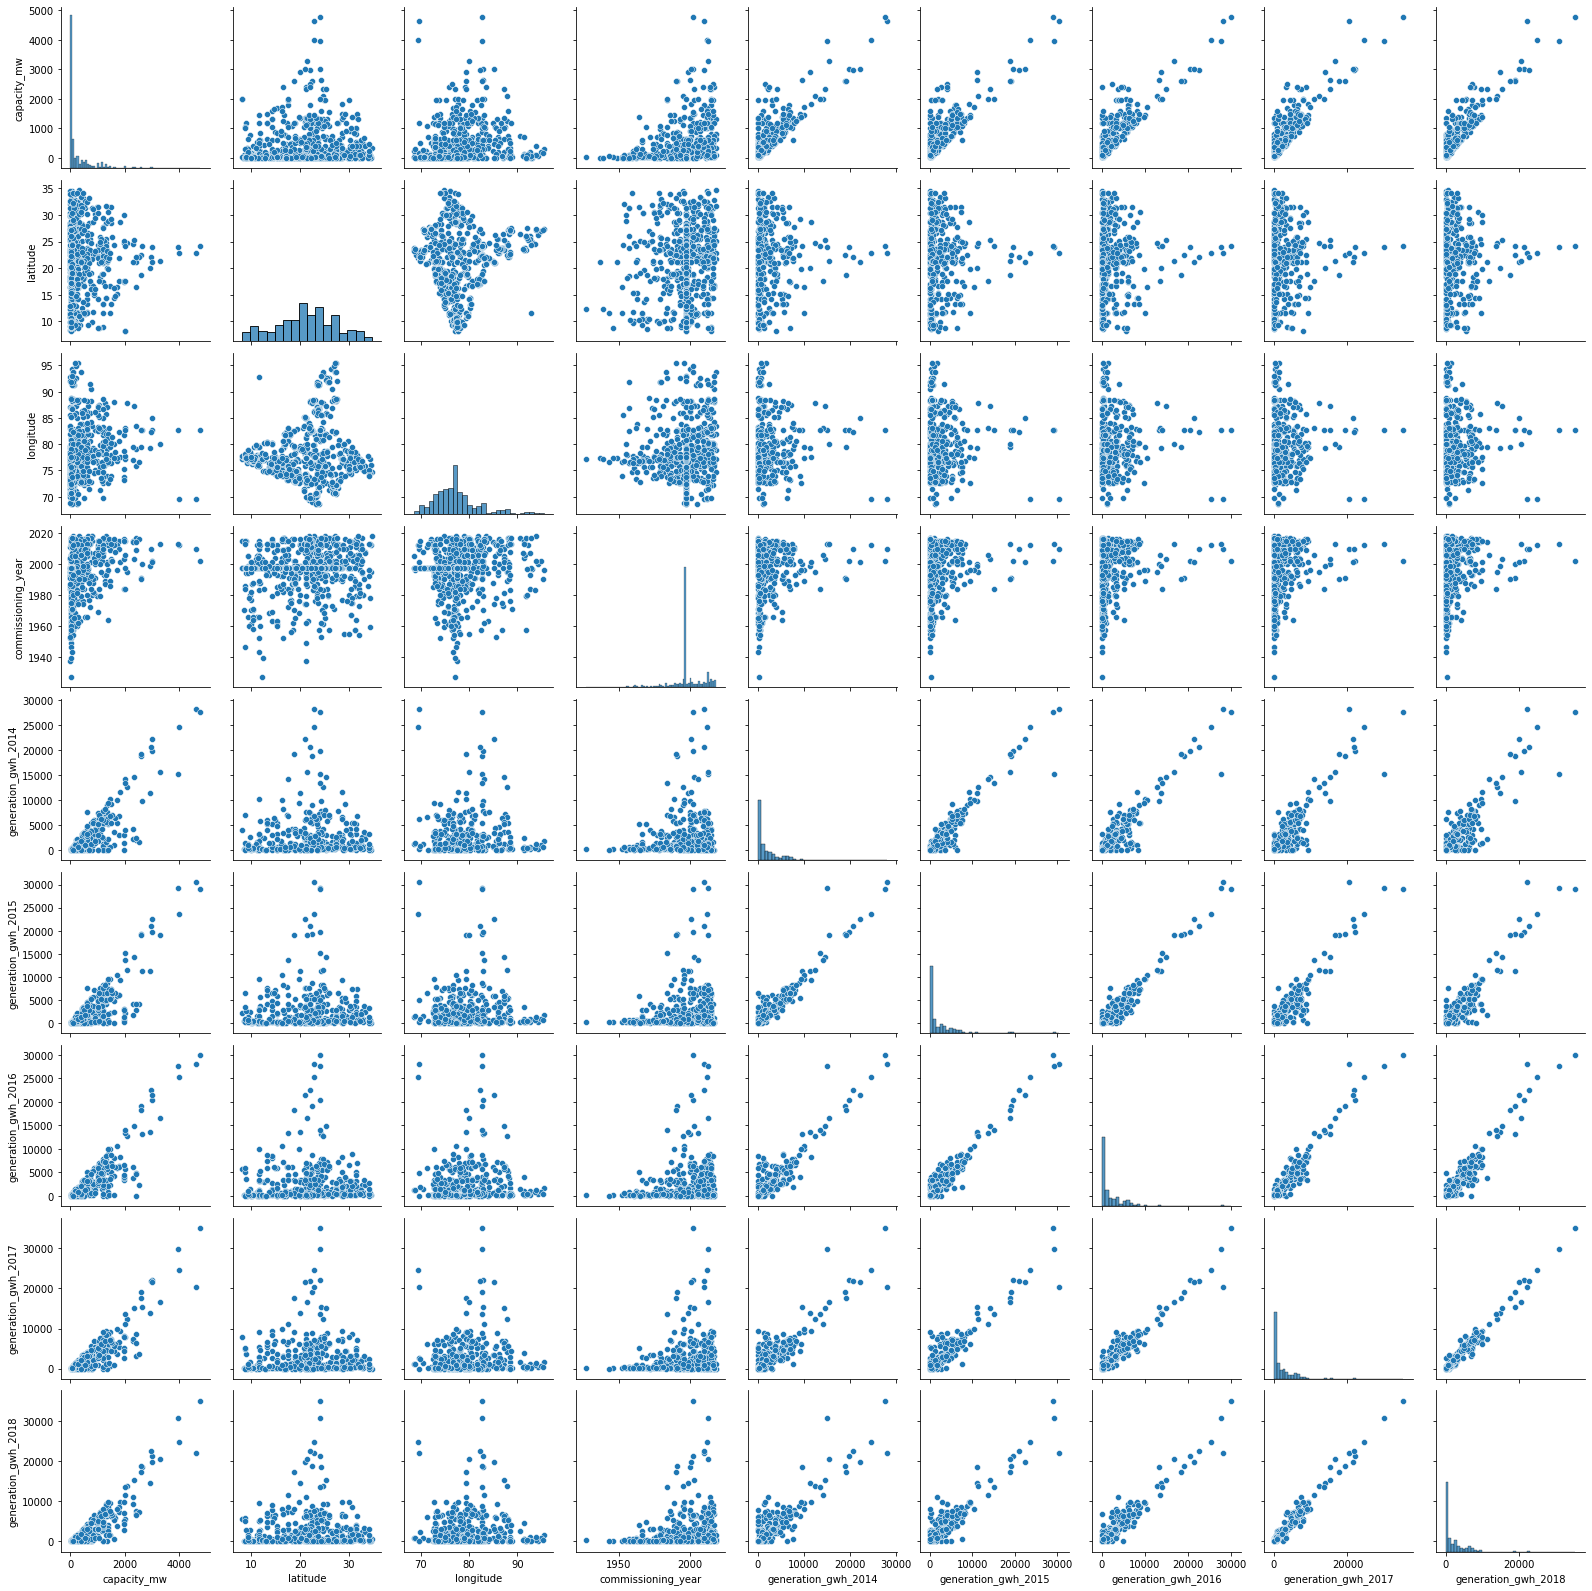

In [21]:
sns.pairplot(df)
plt.show()

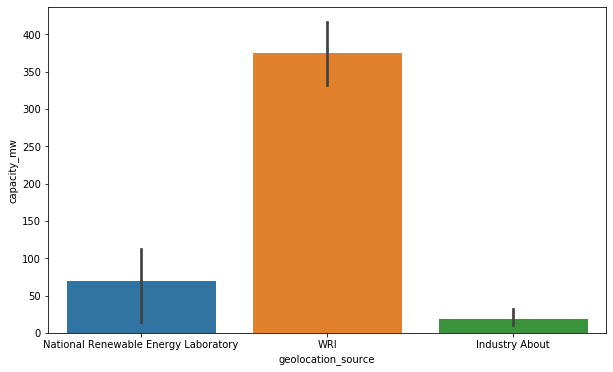

In [22]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

WRI geological source has the highest capacity_mw

In [23]:
#coverting string data into integer data using LabelEncoder
import sklearn
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list1=['name','primary_fuel','other_fuel1','source','geolocation_source','generation_data_source']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,2.5,28.1839,73.2407,6,2,2011.000000,109,1,NaN,NaN,NaN,NaN,NaN,0
1,1,98.0,24.7663,74.6090,1,2,1997.091082,174,2,NaN,NaN,NaN,NaN,NaN,0
2,2,39.2,21.9038,69.3732,7,2,1997.091082,21,2,NaN,NaN,NaN,NaN,NaN,0
3,3,135.0,23.8712,91.3602,2,2,2004.000000,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1800.0,21.9603,82.4091,1,2,2015.000000,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,16.2949,77.3568,1,2,2016.000000,22,2,NaN,0.994875,233.596650,865.400000,686.500000,0
903,903,3.0,12.8932,78.1654,6,2,1997.091082,77,0,NaN,NaN,NaN,NaN,NaN,0
904,904,25.5,15.2758,75.5811,7,2,1997.091082,21,2,NaN,NaN,NaN,NaN,NaN,0
905,905,80.0,24.3500,73.7477,1,2,1997.091082,59,2,NaN,NaN,NaN,NaN,NaN,0


In [24]:
#checking correlation
dfcor=df.corr()
dfcor

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
name,1.000000,0.060240,-0.135247,0.020279,0.040753,-0.074663,-0.043569,-0.014640,0.036225,0.128813,0.108726,0.096807,0.107317,0.096205,NaN
capacity_mw,0.060240,1.000000,0.050984,0.195882,-0.380395,0.003105,0.274292,-0.242122,0.204865,0.839094,0.844352,0.870620,0.886673,0.901918,NaN
latitude,-0.135247,0.050984,1.000000,0.036362,-0.010204,0.036695,0.102069,0.055927,-0.184275,0.060677,0.049134,0.041905,0.041711,0.041414,NaN
longitude,0.020279,0.195882,0.036362,1.000000,-0.347948,0.030311,0.092331,-0.239333,0.252343,0.016510,0.026404,0.054482,0.053761,0.050548,NaN
primary_fuel,0.040753,-0.380395,-0.010204,-0.347948,1.000000,0.004912,-0.126650,0.053613,-0.483217,-0.405019,-0.393335,-0.408951,-0.421736,-0.421518,NaN
other_fuel1,-0.074663,0.003105,0.036695,0.030311,0.004912,1.000000,0.036904,0.026590,-0.021408,0.024551,0.026836,0.031625,0.023146,0.035729,NaN
commissioning_year,-0.043569,0.274292,0.102069,0.092331,-0.126650,0.036904,1.000000,0.021528,-0.007844,0.160014,0.170363,0.193743,0.191367,0.193694,NaN
source,-0.014640,-0.242122,0.055927,-0.239333,0.053613,0.026590,0.021528,1.000000,-0.505720,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_source,0.036225,0.204865,-0.184275,0.252343,-0.483217,-0.021408,-0.007844,-0.505720,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.128813,0.839094,0.060677,0.016510,-0.405019,0.024551,0.160014,NaN,NaN,1.000000,0.961098,0.937060,0.912561,0.902781,NaN


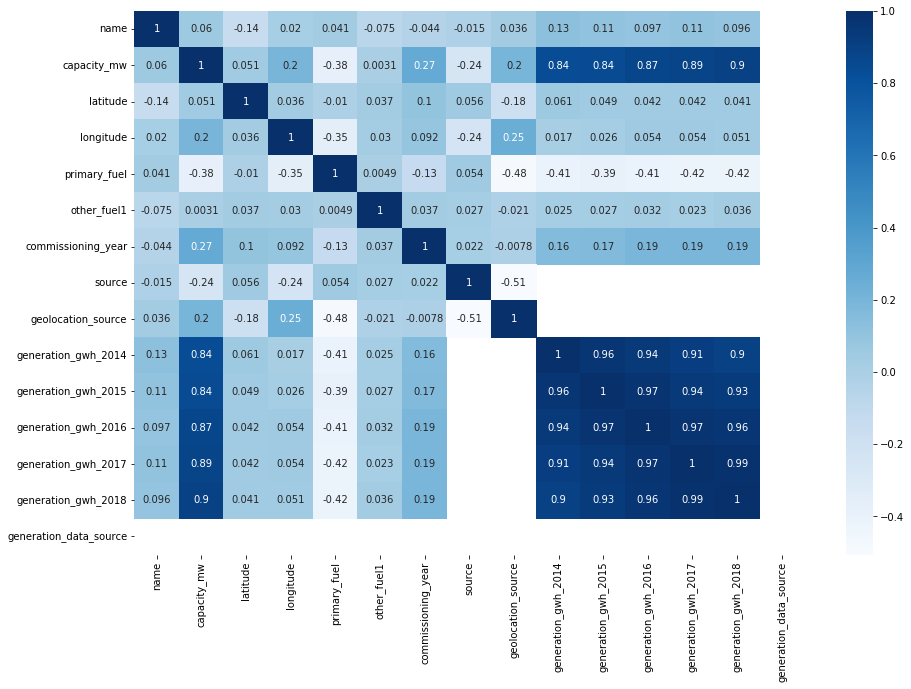

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap="Blues",annot=True)

1. The label capacity_mw is highly positively correlated with the features generation_gwh 2014,2015,2016,2017,2018
2. capaity is negatively correlated with the features primary_fuel, source and Power_plant_age

In [26]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

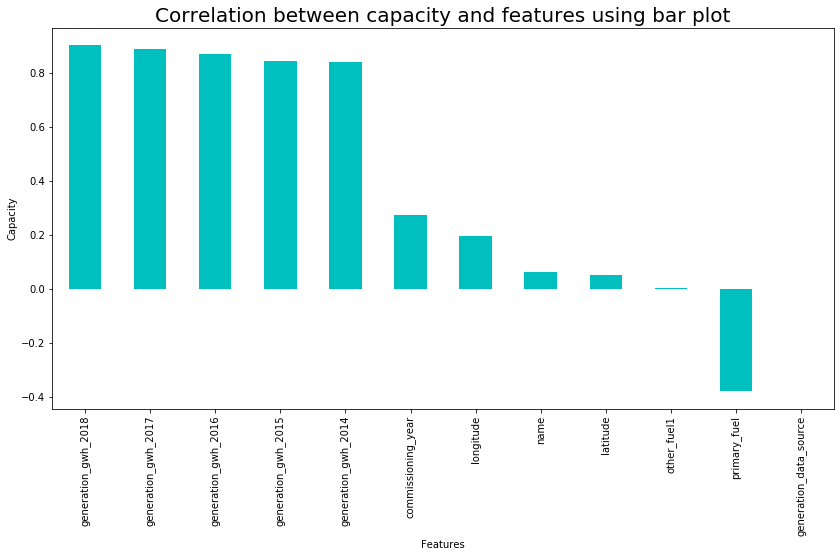

In [27]:
plt.figure(figsize=(14,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

name                         AxesSubplot(0.125,0.749828;0.168478x0.130172)
capacity_mw               AxesSubplot(0.327174,0.749828;0.168478x0.130172)
latitude                  AxesSubplot(0.529348,0.749828;0.168478x0.130172)
longitude                 AxesSubplot(0.731522,0.749828;0.168478x0.130172)
primary_fuel                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
other_fuel1               AxesSubplot(0.327174,0.593621;0.168478x0.130172)
commissioning_year        AxesSubplot(0.529348,0.593621;0.168478x0.130172)
generation_gwh_2014       AxesSubplot(0.731522,0.593621;0.168478x0.130172)
generation_gwh_2015          AxesSubplot(0.125,0.437414;0.168478x0.130172)
generation_gwh_2016       AxesSubplot(0.327174,0.437414;0.168478x0.130172)
generation_gwh_2017       AxesSubplot(0.529348,0.437414;0.168478x0.130172)
generation_gwh_2018       AxesSubplot(0.731522,0.437414;0.168478x0.130172)
generation_data_source       AxesSubplot(0.125,0.281207;0.168478x0.130172)
dtype: object

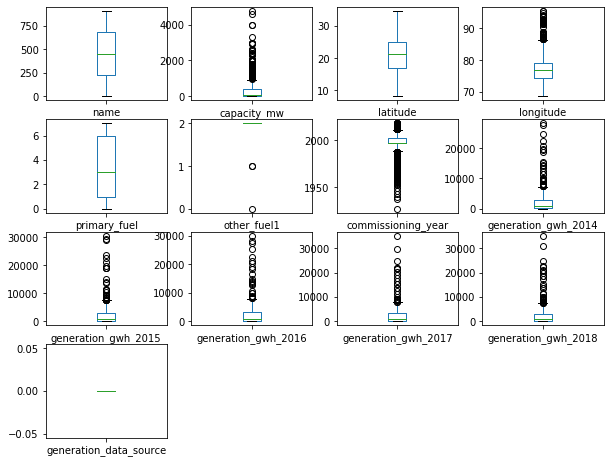

In [28]:
#finding outliers
df.plot(kind='box',subplots=True,figsize=(10,10),layout=(5,4))

outliers are present in the dataset

In [29]:
#checking skewness
df.skew().sort_values()

other_fuel1              -20.453120
commissioning_year        -1.399359
latitude                  -0.149698
name                       0.000000
generation_data_source     0.000000
primary_fuel               0.472251
longitude                  1.141881
capacity_mw                3.123576
generation_gwh_2014        3.342707
generation_gwh_2018        3.476298
generation_gwh_2016        3.512370
generation_gwh_2017        3.566070
generation_gwh_2015        3.665904
dtype: float64

skewness is present

In [34]:
df1=df.copy()
Q1 = df1.quantile(0)
Q3= df1.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

name                       770.10000
capacity_mw                720.00000
latitude                    19.19886
longitude                   13.30444
primary_fuel                 6.00000
other_fuel1                  2.00000
commissioning_year          84.00000
generation_gwh_2014       5295.18000
generation_gwh_2015       5094.78190
generation_gwh_2016       5246.84405
generation_gwh_2017       5631.03285
generation_gwh_2018       6014.95255
generation_data_source       0.00000
dtype: float64


In [35]:
data = df1[~((df1< (Q1 - 1.5 * IQR)) |(df1> (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 13)


outliers are removed

In [39]:
skew = ['longitude','other_fuel1','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [40]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-0.941219,0.058587,NaN,NaN,NaN,NaN,NaN
1,-0.527678,0.058587,NaN,NaN,NaN,NaN,NaN
2,-2.402282,0.058587,NaN,NaN,NaN,NaN,NaN
3,2.171177,0.058587,-0.071963,-0.115824,0.109529,0.134579,-0.043225
4,1.137169,0.058587,1.596280,0.916782,1.451544,1.495059,1.348860


In [41]:
#maximum data is missing
data.drop("generation_gwh_2018",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

In [42]:
data

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_data_source
0,0,2.5,28.1839,-0.941219,6,0.058587,2011.000000,0
1,1,98.0,24.7663,-0.527678,1,0.058587,1997.091082,0
2,2,39.2,21.9038,-2.402282,7,0.058587,1997.091082,0
3,3,135.0,23.8712,2.171177,2,0.058587,2004.000000,0
4,4,1800.0,21.9603,1.137169,1,0.058587,2015.000000,0
...,...,...,...,...,...,...,...,...
902,902,1600.0,16.2949,0.176645,1,0.058587,2016.000000,0
903,903,3.0,12.8932,0.356395,6,0.058587,1997.091082,0
904,904,25.5,15.2758,-0.260644,7,0.058587,1997.091082,0
905,905,80.0,24.3500,-0.782549,1,0.058587,1997.091082,0


# predication with capacity_mw using linear regression

In [44]:
#separating data
x=data.iloc[:,2:]
y=data.iloc[:,1]

In [45]:
x

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_data_source
0,28.1839,-0.941219,6,0.058587,2011.000000,0
1,24.7663,-0.527678,1,0.058587,1997.091082,0
2,21.9038,-2.402282,7,0.058587,1997.091082,0
3,23.8712,2.171177,2,0.058587,2004.000000,0
4,21.9603,1.137169,1,0.058587,2015.000000,0
...,...,...,...,...,...,...
902,16.2949,0.176645,1,0.058587,2016.000000,0
903,12.8932,0.356395,6,0.058587,1997.091082,0
904,15.2758,-0.260644,7,0.058587,1997.091082,0
905,24.3500,-0.782549,1,0.058587,1997.091082,0


In [46]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 877, dtype: float64

In [47]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [48]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_train

array([[-0.62874821, -0.7353614 ,  1.62166056,  0.04130962,  0.01649972,
         0.        ],
       [-1.51297718,  0.62633213, -1.02745284,  0.04130962, -0.62077983,
         0.        ],
       [ 0.0614622 ,  0.57936697, -0.14441504,  0.04130962, -0.85706946,
         0.        ],
       ...,
       [-0.13028759,  0.53232572, -1.02745284,  0.04130962,  1.03324756,
         0.        ],
       [ 0.46228686,  1.15849865, -1.02745284,  0.04130962,  1.4270636 ,
         0.        ],
       [ 0.86000188,  2.14180179, -1.02745284,  0.04130962,  1.58459002,
         0.        ]])

In [49]:
x_test=st.transform(x_test)
x_test

array([[ 1.44968882,  0.49340183, -0.14441504,  0.04130962,  1.4270636 ,
         0.        ],
       [-0.04372571, -1.77173745,  1.18014166,  0.04130962,  0.01649972,
         0.        ],
       [ 1.48617935, -0.54285303,  1.18014166,  0.04130962,  0.01649972,
         0.        ],
       ...,
       [ 1.17342379, -0.07087902, -1.02745284,  0.04130962,  1.19077398,
         0.        ],
       [ 1.50118806,  0.27499681, -0.14441504,  0.04130962, -1.72346476,
         0.        ],
       [ 0.37004515,  2.25374532, -0.14441504,  0.04130962, -1.40841193,
         0.        ]])

In [50]:
x_train.mean()

-4.2764706533999784e-15

In [51]:
x_train.std()

0.9128709291752769

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [53]:
lm=LinearRegression()

In [54]:
lm.fit(x_train,y_train)

LinearRegression()

In [55]:
lm.coef_

array([   2.75853317,   35.83499564, -148.90427352,    6.51310084,
         85.91440627,    0.        ])

In [56]:
lm.intercept_

252.66677172061557

In [57]:
lm.score(x_train,y_train)

0.2509359629001331

In [58]:
pred=lm.predict(x_test)
print("predicted prices",pred)
print("actual prices",y_test)

predicted prices [ 418.72523133   15.01442992   63.27179169  427.45526565  468.63605204
  263.0305899   472.45096003  162.13123187  428.79932982  457.71836927
  411.02361962  561.62750388  539.46071823  427.20750849  525.4068073
  427.12101775  442.93003808   20.09276244   73.20497888   -8.10342771
  453.49116578  453.46157729   31.22230148   20.09276244  535.74482732
    0.65116725  328.16170478  395.66855266  204.82547834   -9.08161681
    7.42070601  -58.73542718  341.12051139   45.22927238  544.12325256
  389.59076098   39.10095897  452.49040554  246.69569018 -123.56103385
  259.57066038  -67.62249706    1.37933454  420.49855584  426.89721467
  306.97743846  406.15391318  412.90852109  476.48408689   72.34498166
  540.12637291  492.59837792  332.05068658  450.26985059  275.68573267
  381.96261476    2.97684715   25.00212591  517.53190826   10.50753448
  472.8492377   400.85333387  286.59869179  -55.58720183   80.64263099
  372.48996468  151.91725179  488.62252005  -51.67873279  389

In [59]:
print("error:")
print("mean absolute error",mean_absolute_error(y_test,pred))
print("mean squared error",mean_squared_error(y_test,pred))
print("root mean squared error",np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 244.7574571370071
mean squared error 118223.71328390652
root mean squared error 343.8367538293522


In [60]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.19742195616433023


In [61]:
# Regularization:: L1 L2
from sklearn.linear_model import Lasso,Ridge

In [62]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.2509359628999339

In [63]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.250935962429924


array([   2.75918419,   35.83679538, -148.896415  ,    6.51234072,
         85.91067102,    0.        ])

In [64]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))
print("mean absolute error",mean_absolute_error(y_test,pred))
print("mean squared error",mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

-0.010826752478048096
-0.1779600453071044
-0.16448196285497563
mean absolute error 244.7574571370071
mean squared error 118223.71328390652
0.19742195616433023


In [65]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

knr.score(x_train,y_train)
predknr=knr.predict(x_test)
print(predknr)

knr.score(x_test,y_test)
print("mean absolute error",mean_absolute_error(y_test,pred))
print("mean squared error",mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

[ 560.404    54.       10.62    155.1     345.6     252.3      24.8
  268.56     54.94     21.54    195.      767.     1072.6      94.041
  761.2     155.1     441.7      39.76     24.12     30.51    918.4348
  932.       19.4      39.76    313.       36.82    426.9      50.5
  516.12     30.51     44.74     47.65     41.7     145.8     233.
   84.24      3.4      23.3      96.69     32.74     68.2      44.06
   10.8     634.      155.1     468.8     373.4     553.9428   24.8
    9.04    844.       88.      272.6428   22.5       9.52    181.836
   44.06      5.      250.       51.       26.      679.612    52.1
   30.61     24.84    124.94    253.76    207.6      26.92     84.24
   23.13     90.591    23.13    441.7     972.2     257.      503.12
   26.92     44.06     33.94     83.2     109.2     679.612     7.4
   25.06    712.0348   31.56     17.4      42.2       8.32    426.
  687.       21.64     26.6     332.2     355.2       9.52     14.26
   24.12     30.61    288.336   189.8  

In [66]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred=dtr.predict(x_test)
print(dtrpred)

dtr.score(x_test,y_test)
print("mean absolute error",mean_absolute_error(y_test,pred))
print("mean squared error",mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

[2.34000e+02 2.21000e+02 1.90000e+01 6.00000e+02 1.60000e+02 4.50000e+00
 2.60000e+01 3.28000e+01 1.00000e+01 2.40000e+01 2.25000e+02 1.20000e+03
 1.50000e+02 1.55000e+01 5.40000e+02 6.75000e+01 6.35000e+01 2.76800e+01
 5.00000e+00 1.70000e+00 7.68000e+02 1.34000e+03 4.00000e+01 2.76800e+01
 4.50000e+01 2.55000e+01 1.35000e+01 2.50000e+01 5.10000e+02 1.70000e+00
 1.05000e+01 1.48500e+01 3.00000e+01 5.10000e+02 1.00000e+02 9.80000e+01
 5.00000e+00 2.00000e+01 2.70000e+02 9.30000e+00 2.18400e+01 1.12000e+01
 4.00000e+01 1.34000e+03 3.00000e+01 6.25000e+01 2.50000e+01 2.11955e+02
 2.60000e+01 1.00000e+01 1.50000e+03 2.70000e+02 8.15000e+01 2.00000e+01
 1.50000e+01 3.30500e+02 7.89000e+01 4.00000e+01 1.50000e+03 9.00000e+00
 2.40000e+01 7.02860e+02 1.60000e+01 1.48500e+01 1.65000e+01 6.60000e+01
 2.07000e+02 4.20000e+01 8.40000e+00 9.80000e+01 1.50000e+00 6.00000e+01
 2.40000e+01 6.35000e+01 1.44000e+03 3.60000e+01 7.70000e+02 5.25000e+01
 1.12000e+01 2.52000e+01 8.00000e+01 5.92000e+01 7.

In [67]:
#cross validation for decision tree model
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtr,x_test,y_test,cv=3)
print(score)
print(score.mean())
print(score.std())

[ 0.11084033  0.27566115 -0.27244439]
0.03801903247945241
0.229611448632552


In [68]:
#cross validation for knr model
score=cross_val_score(knr,x_test,y_test,cv=3)
print(score)
print(score.mean())
print(score.std())

[0.59715812 0.23189812 0.40489762]
0.4113179541207734
0.1491858608887671


In [69]:
#cross validation for svr model
score=cross_val_score(sv,x_test,y_test,cv=3)
print(score)
print(score.mean())
print(score.std())

[-0.1804908  -0.27419053 -0.21798071]
-0.22422068037237342
0.03850638889893006


In [70]:
#ensembling
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()

In [71]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print('Training r2',train_r2)
rfs=r2_score(y_test,pred_decision)
print("R2Score:",rfs*100)

Training r2 0.9212445778756928
R2Score: 54.644585974700455


# Predication with primary fuel using classification

In [72]:
#separating data
x1=data.drop(['primary_fuel'],axis=1)
y1=data['primary_fuel']

In [73]:
x1

,name,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,generation_data_source
0,0,2.5,28.1839,-0.941219,0.058587,2011.000000,0
1,1,98.0,24.7663,-0.527678,0.058587,1997.091082,0
2,2,39.2,21.9038,-2.402282,0.058587,1997.091082,0
3,3,135.0,23.8712,2.171177,0.058587,2004.000000,0
4,4,1800.0,21.9603,1.137169,0.058587,2015.000000,0
...,...,...,...,...,...,...,...
902,902,1600.0,16.2949,0.176645,0.058587,2016.000000,0
903,903,3.0,12.8932,0.356395,0.058587,1997.091082,0
904,904,25.5,15.2758,-0.260644,0.058587,1997.091082,0
905,905,80.0,24.3500,-0.782549,0.058587,1997.091082,0


In [74]:
y1

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 877, dtype: int32

In [75]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [76]:
#Train Test Split
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.33,random_state=42)

In [78]:
dtc=DecisionTreeClassifier()
sv=SVC()
knn=KNeighborsClassifier()

model=[dtc,sv,knn]

for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm=m.predict(x1_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y1_test,predm))
    print(confusion_matrix(y1_test,predm))
    print(classification_report(y1_test,predm))
    print('\n')

accuracy score of DecisionTreeClassifier() is:
0.6620689655172414
[[15  3  1  0  0  0  1  4]
 [ 3 50  3 11  1  2  1  6]
 [ 0  8  6  6  0  1  0  0]
 [ 0  8  7 63  1  1  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  0  3  1  0  2  0  0]
 [ 2  4  0  0  0  0 26  6]
 [ 3  2  1  0  0  0  5 30]]
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        24
           1       0.65      0.65      0.65        77
           2       0.27      0.29      0.28        21
           3       0.78      0.79      0.78        80
           4       0.00      0.00      0.00         3
           5       0.33      0.33      0.33         6
           6       0.79      0.68      0.73        38
           7       0.65      0.73      0.69        41

    accuracy                           0.66       290
   macro avg       0.52      0.51      0.51       290
weighted avg       0.66      0.66      0.66       290



accuracy score of SVC() is:
0.3793103448275862
[[ 0  0  0 24  0 

In [80]:
score=cross_val_score(sv,x1,y1,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.375      0.39204545 0.4        0.42285714 0.37714286]
0.39340909090909093
0.017412480233148654


In [81]:
score=cross_val_score(dtc,x1,y1,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.61931818 0.625      0.74285714 0.69714286 0.60571429]
0.6580064935064935
0.05301316199694965


In [82]:
score=cross_val_score(knn,x1,y1,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.26704545 0.23295455 0.26285714 0.25714286 0.33142857]
0.2702857142857143
0.03277341238389544


In [83]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(x1_train,y1_train)
predrf=rf.predict(x1_test)
print(accuracy_score(y1_test,predrf))
print(confusion_matrix(y1_test,predrf))
print(classification_report(y1_test,predrf))

0.7517241379310344
[[16  2  0  0  0  0  2  4]
 [ 1 56  4  7  0  0  3  6]
 [ 0  8 11  2  0  0  0  0]
 [ 0  6  3 69  0  1  1  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  3  1  0  2  0  0]
 [ 1  4  0  0  0  0 31  2]
 [ 3  0  0  0  0  0  5 33]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.73      0.73      0.73        77
           2       0.50      0.52      0.51        21
           3       0.86      0.86      0.86        80
           4       0.00      0.00      0.00         3
           5       0.67      0.33      0.44         6
           6       0.74      0.82      0.78        38
           7       0.73      0.80      0.77        41

    accuracy                           0.75       290
   macro avg       0.62      0.59      0.60       290
weighted avg       0.74      0.75      0.75       290



In [84]:
#saving the best model
import pickle
filename='powerplant.pkl'
pickle.dump(dtc, open(filename, 'wb'))
#load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(x1_test)

array([3, 6, 6, 0, 3, 3, 0, 3, 6, 1, 2, 1, 1, 3, 1, 1, 1, 7, 7, 0, 3, 1,
       6, 6, 1, 2, 3, 7, 3, 0, 7, 7, 2, 3, 1, 0, 6, 0, 1, 3, 2, 6, 6, 1,
       5, 3, 7, 2, 7, 6, 1, 0, 1, 0, 3, 3, 0, 6, 1, 6, 7, 1, 3, 7, 7, 1,
       3, 2, 7, 1, 7, 1, 7, 1, 1, 2, 1, 7, 7, 5, 3, 3, 1, 1, 0, 3, 7, 6,
       3, 6, 1, 1, 7, 6, 2, 1, 3, 6, 0, 7, 3, 3, 1, 1, 3, 2, 5, 3, 1, 2,
       1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 7, 0, 1, 3, 7, 3, 3, 1, 6,
       6, 6, 7, 6, 1, 1, 1, 0, 3, 1, 7, 7, 3, 6, 1, 3, 2, 7, 1, 2, 6, 1,
       1, 2, 3, 1, 6, 3, 1, 2, 0, 1, 1, 7, 3, 1, 7, 5, 6, 1, 3, 0, 3, 7,
       1, 0, 1, 7, 7, 1, 3, 7, 3, 7, 1, 1, 1, 6, 0, 2, 3, 1, 3, 1, 1, 3,
       3, 0, 6, 3, 3, 1, 1, 2, 6, 2, 7, 1, 0, 1, 5, 3, 2, 3, 2, 2, 3, 6,
       6, 6, 1, 3, 1, 3, 7, 7, 3, 7, 3, 3, 3, 3, 3, 3, 3, 6, 1, 1, 7, 3,
       1, 7, 3, 4, 7, 1, 1, 1, 7, 3, 0, 2, 7, 3, 3, 7, 5, 3, 2, 1, 3, 4,
       7, 0, 3, 0, 7, 7, 6, 3, 3, 7, 1, 6, 6, 3, 3, 0, 3, 3, 3, 3, 7, 3,
       3, 1, 3, 3])

decision tree classifier gives the accuracy of 75% so saving it as a best model